# NAME: DEEPA KUMARI
## TASK 5: Exploratory Data Analysis

In [28]:
#importing libraries
import joypy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calmap
from pandas_profiling import ProfileReport
import time

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

## Initial data exploration

In [3]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


#### Checking the datatypes of each column

In [4]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### The postal code need not be an integer

In [5]:
data['Postal Code']=data['Postal Code'].astype(str)

In [6]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


#### Q1. What does the distribution of profit look like?

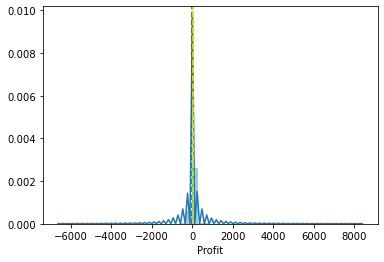

In [8]:
sns.distplot(data['Profit'])
plt.axvline(x=np.mean(data['Profit']), c='red', ls='--')
plt.axvline(x=np.percentile(data['Profit'],25),c='green',ls='--')
plt.axvline(x=np.percentile(data['Profit'],75),c='yellow',ls='--')

array([[<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

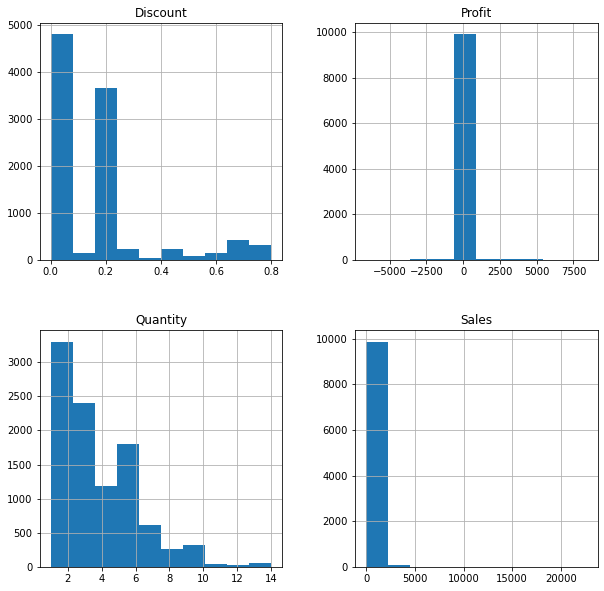

In [10]:
data.hist(figsize=(10,10))

#### Which segment makes the most orders?

In [11]:
#Getting all the unique segment types
data['Segment'] = data['Segment'].replace({'Home Office':'Home_Office'})
segmentTypes = data['Segment'].unique()
print(segmentTypes)

['Consumer' 'Corporate' 'Home_Office']


In [12]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home_Office    1783
Name: Segment, dtype: int64

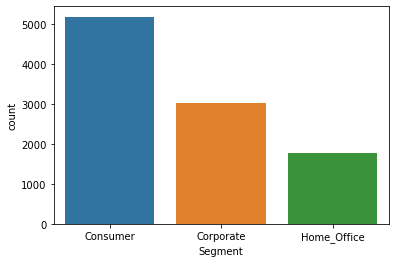

In [13]:
ax = sns.countplot(x='Segment',data=data)
plt.show()

#### Profits generated by each segment


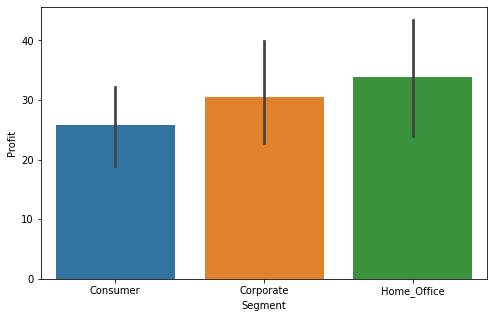

In [14]:
plt.figure(figsize=(8,5))
chart = sns.barplot(data=data,x='Segment',y='Profit')

#### Q2. Exploring the relationship between discounts and profit.

<AxesSubplot:xlabel='Profit', ylabel='Discount'>

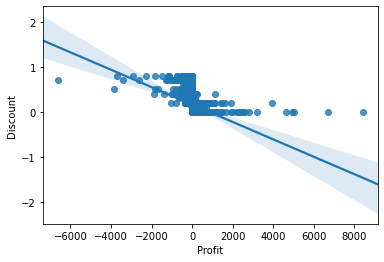

In [15]:
sns.regplot(data['Profit'],data['Discount'])

### Generating a Profile Report

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
dataset = pd.read_csv('SampleSuperstore.csv')
prof = ProfileReport(dataset)
prof

Number of variables,13
Number of observations,9994
Total Missing (%),0.0%
Total size in memory,1015.1 KiB
Average record size in memory,104.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,1


#### Correlation Analysis

In [18]:
np.round(data.corr(),2)

,Sales,Quantity,Discount,Profit
Sales,1.00,0.20,-0.03,0.48
Quantity,0.20,1.00,0.01,0.07
Discount,-0.03,0.01,1.00,-0.22
Profit,0.48,0.07,-0.22,1.00


#### Heatmap to see visualize the tabulation

<AxesSubplot:>

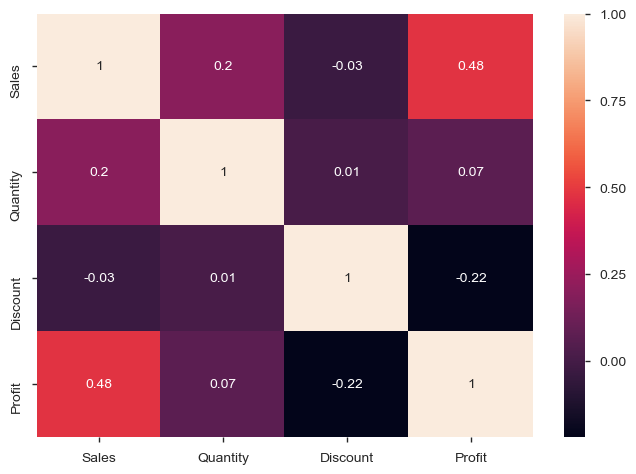

In [19]:
sns.heatmap(np.round(data.corr(),2),annot = True)

## Business Derivations

#### Plotting sales of different sub-categories

[Text(0, 0, 'Bookcases'),
 Text(1, 0, 'Chairs'),
 Text(2, 0, 'Labels'),
 Text(3, 0, 'Tables'),
 Text(4, 0, 'Storage'),
 Text(5, 0, 'Furnishings'),
 Text(6, 0, 'Art'),
 Text(7, 0, 'Phones'),
 Text(8, 0, 'Binders'),
 Text(9, 0, 'Appliances'),
 Text(10, 0, 'Paper'),
 Text(11, 0, 'Accessories'),
 Text(12, 0, 'Envelopes'),
 Text(13, 0, 'Fasteners'),
 Text(14, 0, 'Supplies'),
 Text(15, 0, 'Machines'),
 Text(16, 0, 'Copiers')]

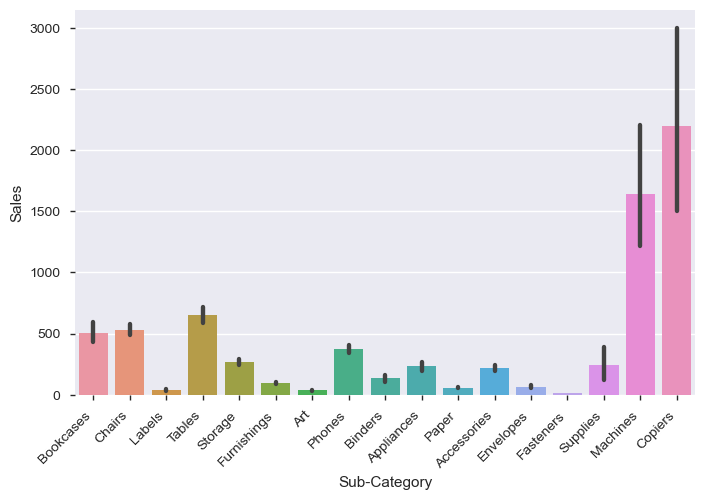

In [20]:
plt.figure(figsize=(8,5))
chart = sns.barplot(data=data,x='Sub-Category',y='Sales')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

##### From the above graph it is visible that 
* FASTENERS 
* ART 
* LABELS
* FURNISHINGS 
* PAPER 
* ENVELOPES
##### Have very low sales profits compared to the other items sold. Hence, the comapny could provide eye-catching schemes and discounts to lure more customers to buy these items.*

#### Plotting Profits of different sub-categories 

[Text(0, 0, 'Bookcases'),
 Text(1, 0, 'Chairs'),
 Text(2, 0, 'Labels'),
 Text(3, 0, 'Tables'),
 Text(4, 0, 'Storage'),
 Text(5, 0, 'Furnishings'),
 Text(6, 0, 'Art'),
 Text(7, 0, 'Phones'),
 Text(8, 0, 'Binders'),
 Text(9, 0, 'Appliances'),
 Text(10, 0, 'Paper'),
 Text(11, 0, 'Accessories'),
 Text(12, 0, 'Envelopes'),
 Text(13, 0, 'Fasteners'),
 Text(14, 0, 'Supplies'),
 Text(15, 0, 'Machines'),
 Text(16, 0, 'Copiers')]

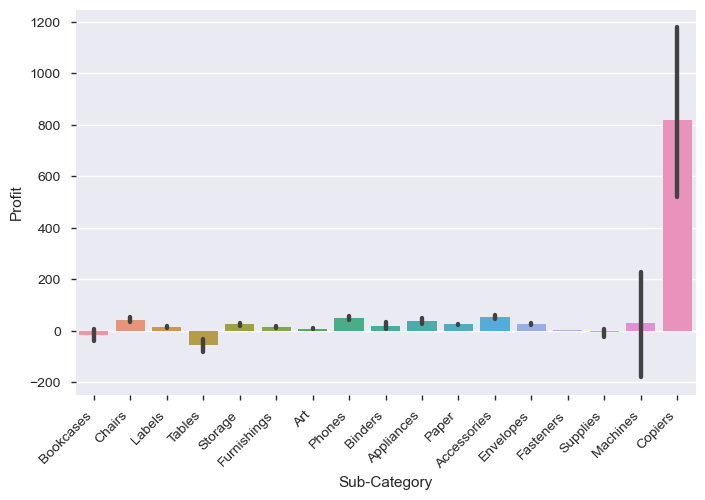

In [21]:
plt.figure(figsize=(8,5))
chart = sns.barplot(data=data,x='Sub-Category',y='Profit')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### We see that although Tables have a moderately fair sales number but the company is incurring losses. The price of tables can be hence increased to help uplift the profit numbers.

### Feature Comparison

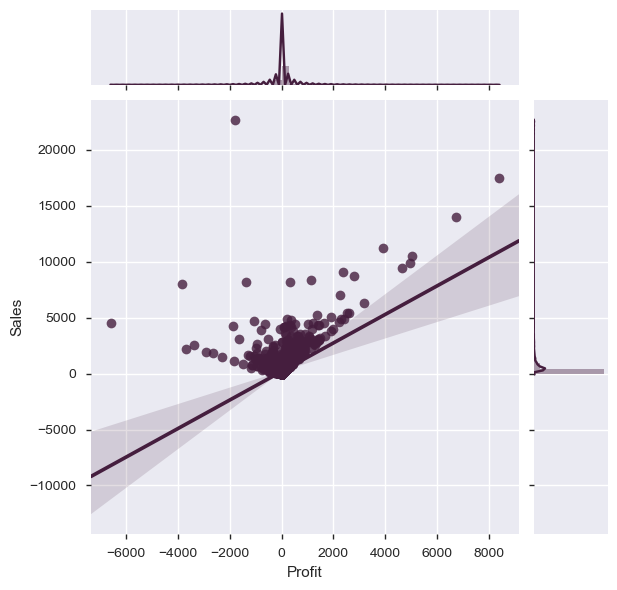

In [21]:
sns.jointplot(data.loc[:,'Profit'],
              data.loc[:,'Sales'],
              kind="regg",
              color="#451e3e");